In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#parte 1
#clustering jeráquico
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

import scipy.cluster.hierarchy as shc

#customer_data = pd.read_csv('/content/drive/MyDrive/ML/datasets/shopping-data.csv')
#customer_data.head()

#parte 1.3
'''from sklearn.datasets import fetch_california_housing
california=fetch_california_housing()
california_df=pd.DataFrame(california.data,
                           columns=california.feature_names)'''
#final
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)
pd.set_option('max_columns', 5)
pd.set_option('display.width', None)
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]
iris_df.head

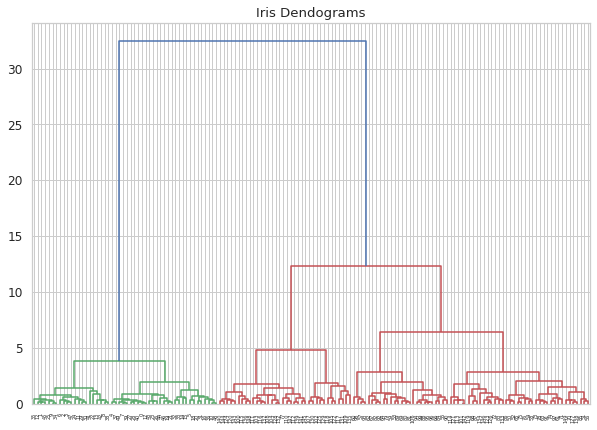

In [ ]:
'''data = customer_data.iloc[:, 3:5].values
data
plt.figure(figsize=(10,7))
plt.title("Customer Dendograms")
dend=shc.dendrogram(shc.linkage(data, method='ward'))##1weighted, complete, centroid, average, single
#dend=shc.dendrogram(shc.linkage(data, method='weighted'))
#dend=shc.dendrogram(shc.linkage(data, method='complete'))
#dend=shc.dendrogram(shc.linkage(data, method='centroid'))
#dend=shc.dendrogram(shc.linkage(data, method='average'))
#dend=shc.dendrogram(shc.linkage(data, method='single'))'''
#parte1.3
'''data=california_df.iloc[:, 0:6].values#primeras 6 columnas
data
plt.figure(figsize=(10,7))
plt.title("California Dendograms")
dend=shc.dendrogram(shc.linkage(data, method='ward'))'''
#final
data=iris_df.iloc[:, 0:4].values#primeras 4 columnas
plt.figure(figsize=(10,7))
plt.title("Iris Dendograms")
dend=shc.dendrogram(shc.linkage(data, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,
                                affinity='euclidean',
                                linkage='ward')#complete, average, single

cluster.fit_predict(data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

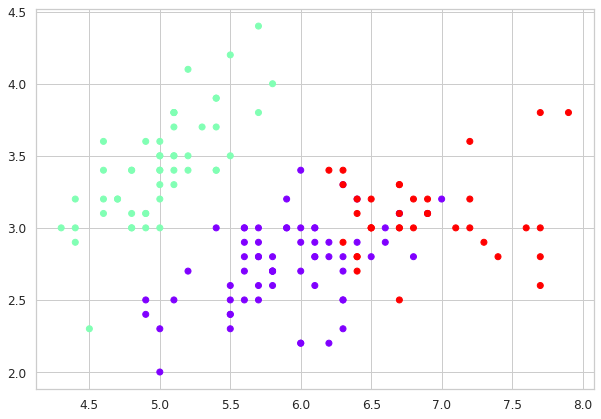

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

1. Modifique la estrategia de enlace(linkage method) del algoritmo de SciPy utilizando las
siguientes opciones:weighted, complete, centroid, average, single. Ejecute el c´odigo y
presente la dendrograma generado con cada opci´on.
2. Modifique la estrategia de enlace(linkage) del algoritmo utilizando las siguientes opciones:
complete, average, single. Ejecute el c´odigo y presente la gr´afica con los grupos creados.
3. Tomando en cuenta el programa original utilice el dataset california housing de SKlearn,
seleccione solo las 6 primeras columnas, realice los ajustes necesarios y ejecute el algoritmo.
Presente el dendrograma y gr´afica generado por el c´odigo.

In [ ]:
#parte 2
#KMeans y PCA
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_iris
iris = load_iris()
#print(iris.DESCR)
import pandas as pd
pd.set_option('max_columns', 5)
pd.set_option('display.width', None)
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]
iris_df.head()
#2.1
'''from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)
import pandas as pd
pd.set_option('max_columns', 64)
pd.set_option('display.width', None)
digits_df = pd.DataFrame(digits.data, columns=digits.feature_names)
digits_df['species'] = [digits.target_names[i] for i in digits.target]
digits_df.head()'''

"from sklearn.datasets import load_digits\ndigits = load_digits()\nprint(digits.DESCR)\nimport pandas as pd\npd.set_option('max_columns', 64)\npd.set_option('display.width', None)\ndigits_df = pd.DataFrame(digits.data, columns=digits.feature_names)\ndigits_df['species'] = [digits.target_names[i] for i in digits.target]\ndigits_df.head()"

In [ ]:
pd.set_option('precision', 2)
iris_df.describe()
#2.1
#digits_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [ ]:
iris_df['species'].describe()
#2.1
#digits_df['species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

"sns.set(font_scale=1.1)\nsns.set_style('whitegrid')\ngrid = sns.pairplot(data=digits_df, vars=digits_df.columns[0:63],\n                    hue='species')"

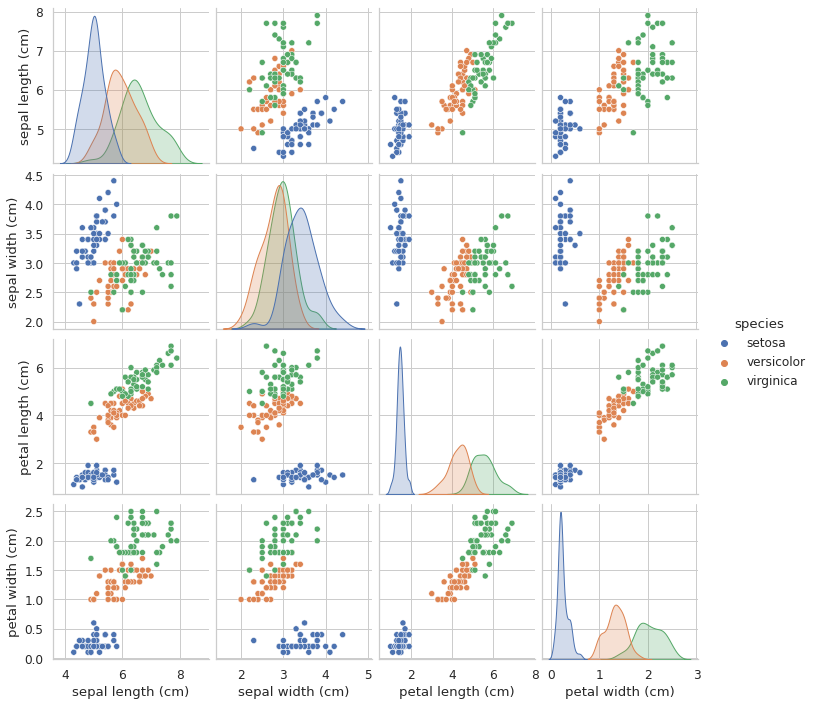

In [ ]:
# crea un pairplot, una matriz con varias gráficas, para observar como se
#relacionan las dimensiones del dataset cuando se grafican en pares. Se utiliza la librería Seaborn.
sns.set(font_scale=1.1)
sns.set_style('whitegrid')
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4],
                    hue='species')
#2.1
'''sns.set(font_scale=1.1)
sns.set_style('whitegrid')
grid = sns.pairplot(data=digits_df, vars=digits_df.columns[0:63],
                    hue='species')'''

In [ ]:
#Creando un Estimador KMeans
#Entrenamiento del Modelo
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, random_state=11)
kmeans.fit(iris.data)
#2.1
#kmeans.fit(digits.data)

KMeans(n_clusters=3, random_state=11)

In [ ]:
#Estudiando la distribución original de clases en el dataset
print(kmeans.labels_[0:50])
print(kmeans.labels_[50:100])
print(kmeans.labels_[100:150])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[2 0 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2
 2 0 2 2 2 0 2 2 2 0 2 2 0]


In [ ]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=11)
pca.fit(iris.data)
#2.1
#pca.fit(digits.data)

PCA(n_components=2, random_state=11)

In [ ]:
iris.data.shape


(1797, 64)

In [ ]:
#Transformado el Dataset Iris de 4 dimensiones a 2 dimensiones
iris_pca = pca.transform(iris.data)
iris_pca.shape
'''digits_pca = pca.transform(digits.data)
digits_pca.shape'''

'digits_pca = pca.transform(digits.data)\ndigits_pca.shape'

"digits_pca_df = pd.DataFrame(digits_pca, columns=['Component1', 'Component2'])\ndigits_pca_df['species'] = digits_df.species\naxes = sns.scatterplot(data=digits_pca_df, x='Component1', \n     y='Component2', hue='species', legend='brief') \ndigits_centers = pca.transform(kmeans.cluster_centers_)\nimport matplotlib.pyplot as plt\ndots = plt.scatter(digits_centers[:,0], digits_centers[:,1], s=100, c='k')"

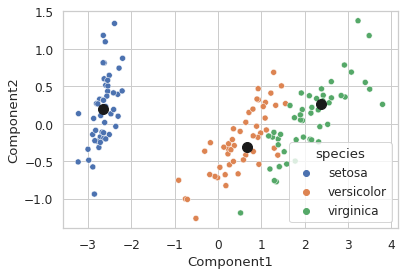

In [ ]:
#Visualización de los datos con su nueva representación.
iris_pca_df = pd.DataFrame(iris_pca, columns=['Component1', 'Component2'])
iris_pca_df['species'] = iris_df.species
axes = sns.scatterplot(data=iris_pca_df, x='Component1', 
     y='Component2', hue='species', legend='brief') 
iris_centers = pca.transform(kmeans.cluster_centers_)
import matplotlib.pyplot as plt
dots = plt.scatter(iris_centers[:,0], iris_centers[:,1], s=100, c='k')
#2.1
'''digits_pca_df = pd.DataFrame(digits_pca, columns=['Component1', 'Component2'])
digits_pca_df['species'] = digits_df.species
axes = sns.scatterplot(data=digits_pca_df, x='Component1', 
     y='Component2', hue='species', legend='brief') 
digits_centers = pca.transform(kmeans.cluster_centers_)
import matplotlib.pyplot as plt
dots = plt.scatter(digits_centers[:,0], digits_centers[:,1], s=100, c='k')'''

In [ ]:
#Escogiendo el mejor estimador
from sklearn.cluster import DBSCAN, MeanShift,\
     SpectralClustering, AgglomerativeClustering

estimators = {
    'KMeans': kmeans,
    'DBSCAN': DBSCAN(),
    'MeanShift': MeanShift(),
    'SpectralClustering': SpectralClustering(n_clusters=3),
    'AgglomerativeClustering': 
        AgglomerativeClustering(n_clusters=3)
}
import numpy as np

for name, estimator in estimators.items():
     estimator.fit(iris.data)
     print(f'\n{name}:')
     for i in range(0, 101, 50):
         labels, counts = np.unique(
             estimator.labels_[i:i+50], return_counts=True)
         print(f'{i}-{i+50}:')
         for label, count in zip(labels, counts):
             print(f'   label={label}, count={count}')


KMeans:
0-50:
   label=1, count=50
50-100:
   label=0, count=48
   label=2, count=2
100-150:
   label=0, count=14
   label=2, count=36

DBSCAN:
0-50:
   label=-1, count=1
   label=0, count=49
50-100:
   label=-1, count=6
   label=1, count=44
100-150:
   label=-1, count=10
   label=1, count=40

MeanShift:
0-50:
   label=1, count=50
50-100:
   label=0, count=49
   label=1, count=1
100-150:
   label=0, count=50

SpectralClustering:
0-50:
   label=0, count=50
50-100:
   label=1, count=50
100-150:
   label=1, count=15
   label=2, count=35

AgglomerativeClustering:
0-50:
   label=1, count=50
50-100:
   label=0, count=49
   label=2, count=1
100-150:
   label=0, count=15
   label=2, count=35


1. Modifique el programa para utilizar el dataset Digits de SKLearn. Para este caso realice los
ajustes necesarios y puede eliminar la generaci´on de la gr´afica de pairplot y la evaluaci´on
de estimadores.
2. Ejecute el c´odigo y presente la gr´afica resultante luego de la reducci´on de dimensiones con
PCA.

In [ ]:
#parte 3
# Define functions to connect to Google and change directories
def connectDrive():
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

def changeDirectory(path):
    import os
    original_path = os.getcwd()
    os.chdir(path)
    new_path = os.getcwd()
    print("Original path: ",original_path)
    print("New path: ",new_path)

# Connect to Google Drive
connectDrive()

# Change path
changeDirectory("/content/drive/MyDrive/ML/datasets/")

Mounted at /content/drive
Original path:  /content
New path:  /content/drive/MyDrive/ML/datasets


In [ ]:
# Import libraries
'''Main'''
import numpy as np
import pandas as pd
import os, time
import pickle, gzip

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
#Cargar Dataset
# Load datasets
current_path = os.getcwd()
file = os.path.sep.join(['', 'creditcard.csv'])
data = pd.read_csv(current_path + file)

In [ ]:
#Detección de Anomalías con PCA
#suppress warning
pd.set_option('mode.chained_assignment',None)
#División eb conjuntos y escala de las características
dataX = data.drop(['Class'],axis=1)
dataY = data.loc[:,'Class'].copy()
X_train, X_test, y_train, y_test = \
  train_test_split(dataX, dataY, test_size=0.33, random_state=2018, stratify=dataY)
featuresToScale=X_train.columns
sX=pp.StandardScaler(copy=True)
X_train.loc[:,featuresToScale]=sX.fit_transform(X_train.loc[:,featuresToScale])
X_test.loc[:,featuresToScale]=sX.transform(X_test.loc[:,featuresToScale])


In [ ]:
# Graficar Resultados
def plotResults(trueLabels, anomalyScores, returnPreds = False):
    preds = pd.concat([trueLabels, anomalyScores], axis=1)
    preds.columns = ['trueLabel', 'anomalyScore']
    precision, recall, thresholds = \
        precision_recall_curve(preds['trueLabel'],preds['anomalyScore'])
    average_precision = \
        average_precision_score(preds['trueLabel'],preds['anomalyScore'])
    
    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    
    plt.title('Curva Precision-Recall : Precisión Media  = \
    {0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds = roc_curve(preds['trueLabel'], \
                                     preds['anomalyScore'])
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='Curva ROC')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa Verdaderos Positivos')
    plt.title('Receiver operating characteristic: \
    Área bajo la curva = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()
    
    if returnPreds==True:
        return preds

In [ ]:
# View scatterplot
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["1er Vector", "2º Vector", "Label"]
    sns.lmplot(x="1er Vector", y="2º Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separación de las observaciones usando "+algoName)

In [ ]:
#Calculo del error de reconstrucción
def anomalyScores(originalDF, reducedDF):
  loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
  loss = pd.Series(data=loss, index=originalDF.index)
  loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
  return loss


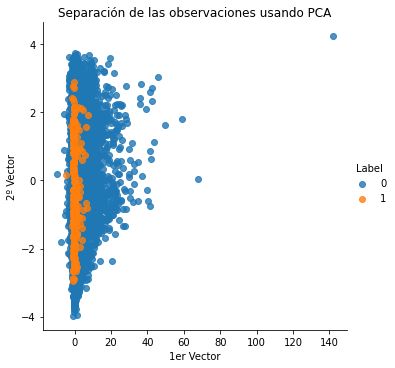

In [ ]:
#PCA
# 30 principal components
from sklearn.decomposition import PCA

n_components = 30
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, \
                                   index=X_train.index)

scatterPlot(X_train_PCA, y_train, "PCA")

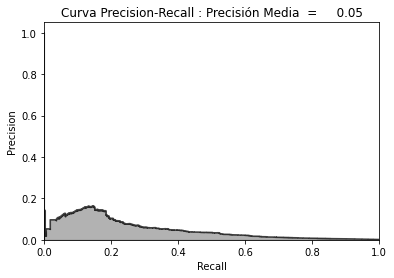

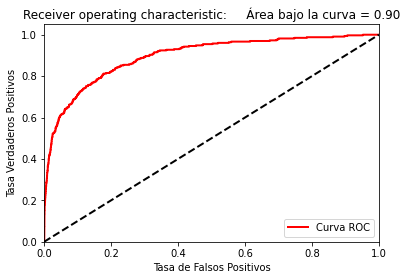

In [ ]:
# View plot
anomalyScoresPCA = anomalyScores(X_train, X_train_PCA_inverse)
preds = plotResults(y_train, anomalyScoresPCA, True)

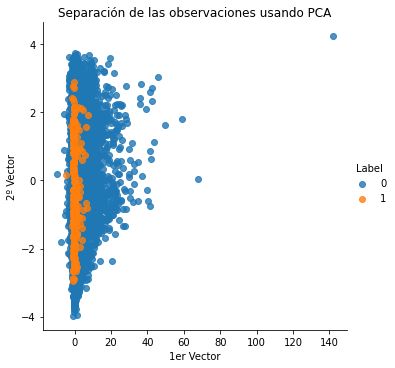

In [ ]:
# 27 principal components
from sklearn.decomposition import PCA

n_components = 27
#n_components = 22
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, \
                                   index=X_train.index)

scatterPlot(X_train_PCA, y_train, "PCA")

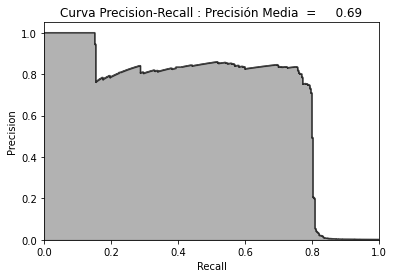

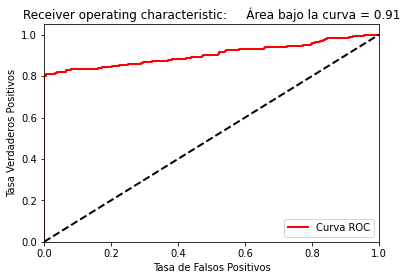

In [ ]:
# View plot
anomalyScoresPCA = anomalyScores(X_train, X_train_PCA_inverse)
preds = plotResults(y_train, anomalyScoresPCA, True)

In [ ]:
# Analyze results
preds.sort_values(by="anomalyScore",ascending=False,inplace=True)
cutoff = 350
predsTop = preds[:cutoff]
print("Precision: ",np.round(predsTop. \
            anomalyScore[predsTop.trueLabel==1].count()/cutoff,2))
print("Recall: ",np.round(predsTop. \
            anomalyScore[predsTop.trueLabel==1].count()/y_train.sum(),2))
print("Fraude detectado en 330 casos:", predsTop.trueLabel.sum())

Precision:  0.75
Recall:  0.79
Fraude detectado en 330 casos: 261


In [ ]:
# Seleccionar los 330 fraudes y 2000 no fraude
from sklearn.utils import resample
fraud_indices = y_train[y_train==1].index
non_fraud_indices = resample(y_train[y_train==0],n_samples=2000,random_state=2021).index
sample_indices = fraud_indices.append(non_fraud_indices)

In [ ]:
# Log data
y_train[sample_indices].to_csv('32_log_labels.tsv', sep = '\t', index=False, header=False)

In [ ]:
# Write dimensions to TSV 
X_train_PCA.loc[sample_indices,:].to_csv('32_log_pca_data.tsv', sep = '\t', index=False, header=False)

Los siguientes archivos TSV se pueden subir a la página https://projector.tensorflow.org/ y observar el gráfico de las instancias en 3D

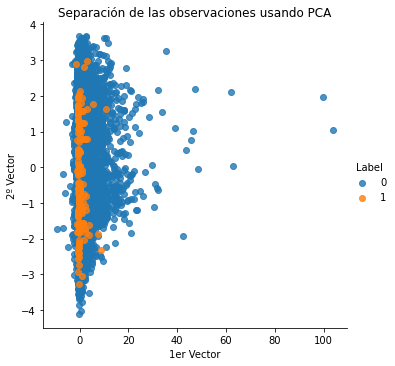

In [ ]:
#PCA
# PCA on Test Set
X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(data=X_test_PCA, index=X_test.index)

X_test_PCA_inverse = pca.inverse_transform(X_test_PCA)
X_test_PCA_inverse = pd.DataFrame(data=X_test_PCA_inverse, \
                                  index=X_test.index)

scatterPlot(X_test_PCA, y_test, "PCA")

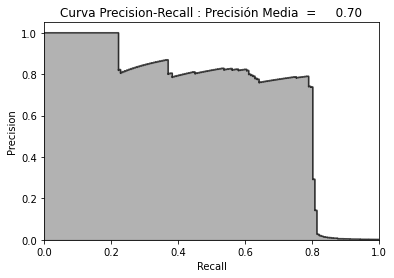

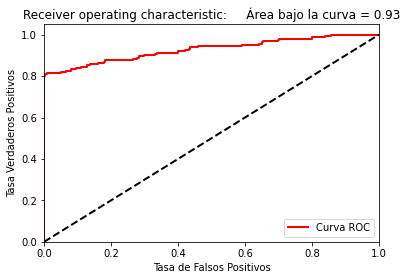

In [ ]:
# View plot
anomalyScoresPCA = anomalyScores(X_test, X_test_PCA_inverse)
preds = plotResults(y_test, anomalyScoresPCA, True)

1. Modifique el programa original y presente los resultados obtenidos (Precisi´on Media) cuando
se seleccionan 2, 7, 13, y 22 componentes.
2. Tomando en cuenta los resultados anteriores: ¿Influye de manera considerable en el resultado
la cantidad de componentes seleccionados?

1. A su criterio, considera que el algoritmo de KMeans y de Clustering Jer´arquico, se pueden
utilizar indistintamente para obtener la misma informaci´on de un dataset? Justifique su
respuesta.
2. Tomando en cuenta el tiempo de ejecuci´on de los algoritmos indique cual considera que
es m´as r´apido.
3. Presente las conclusiones sobre los resultados obtenidos en el laboratorio.